In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (davies_bouldin_score, silhouette_score, calinski_harabasz_score)
pd.options.display.max_columns=150

In [66]:
df = pd.read_csv('onehotdata.csv')

In [67]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,sbytes,sttl,smeansz,ct_dst_sport_ltm,ct_dst_src_ltm,Spkts,Dload,sloss,dloss,ct_src_ ltm,ct_srv_dst
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000010,0.121569,0.043883,0.0,0.000000,0.000196,0.004829,0.0,0.0,0.040816,0.146341
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000039,0.121569,0.087766,0.0,0.027027,0.000392,0.000392,0.0,0.0,0.040816,0.073171
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000011,0.121569,0.048537,0.0,0.000000,0.000196,0.004942,0.0,0.0,0.020408,0.170732
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000010,0.121569,0.043883,0.0,0.000000,0.000196,0.004214,0.0,0.0,0.000000,0.195122
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000011,0.121569,0.048537,0.0,0.000000,0.000196,0.004730,0.0,0.0,0.000000,0.195122


In [68]:
df.shape

(700001, 24)

In [69]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,sbytes,sttl,smeansz,ct_dst_sport_ltm,ct_dst_src_ltm,Spkts,Dload,sloss,dloss,ct_src_ ltm,ct_srv_dst
count,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000
mean,0.615222,0.000010,0.173100,0.023616,0.053293,0.079797,0.000004,0.000294,0.000010,0.033697,0.000020,0.020909,0.000029,0.000366,0.151035,0.085847,0.012179,0.032111,0.004093,0.023384,0.001242,0.003890,0.074869,0.122785
std,0.486543,0.003162,0.378334,0.151849,0.224617,0.270979,0.002070,0.017152,0.003162,0.180448,0.004472,0.143078,0.005345,0.003283,0.156851,0.108681,0.043213,0.059762,0.007863,0.034948,0.003700,0.011806,0.085503,0.113064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000031,0.121569,0.041223,0.000000,0.000000,0.000392,0.000593,0.000000,0.000000,0.020408,0.024390
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000148,0.121569,0.048537,0.000000,0.000000,0.001569,0.005193,0.000785,0.000912,0.061224,0.097561
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000278,0.121569,0.081117,0.000000,0.054054,0.005098,0.029948,0.001374,0.002918,0.102041,0.170732
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Defining Labels

In [70]:
labels = pd.read_csv('anomaly_labels.csv')
labels.Label = [-x if x == 1 else 1 for x in labels.Label ]
anomaly_labels = labels.Label

#### Isolation Forest Model - Base Model

In [11]:
iso_model = IsolationForest(random_state=0).fit(df[['sbytes', 'sttl']])

anomaly_preds = iso_model.predict(df[['sbytes', 'sttl']])
pd.crosstab(anomaly_labels, anomaly_preds)

col_0,-1,1
Label,,
-1,22215,0
1,84692,593094


In [53]:
contingency = pd.DataFrame(pd.crosstab(anomaly_labels, anomaly_preds) )

tp = contingency.iloc[0,0]
tn = contingency.iloc[1,1]
fp = contingency.iloc[1,0]
fn = contingency.iloc[0,1]

recall = tp / (tp+fn)
print('Recall: {:.2f}'.format(recall))

precision = tp/ (tp+fp)
print('Precision: {:.2f}'.format(precision))

Recall: 1.00
Precision: 0.21


#### Evaluation of Model

In [15]:
#print(metrics.silhouette_score(df[['sbytes', 'sttl']], anomaly_preds, metric='euclidean'))

In [16]:
## ratio between the within-cluster dispersion and the between-cluster dispersion.
## higher Calinski-Harabasz score relates to a model with better defined clusters.

calinski_harabasz_score(df[['sbytes', 'sttl']], anomaly_preds)


15259.993700364812

In [17]:
##  average similarity measure of each cluster with its most similar cluster,
## The minimum score is zero, with lower values indicating better clustering.
davies_bouldin_score(df[['sbytes', 'sttl']], anomaly_preds)

1.0364155206689771

#### Data Visualization

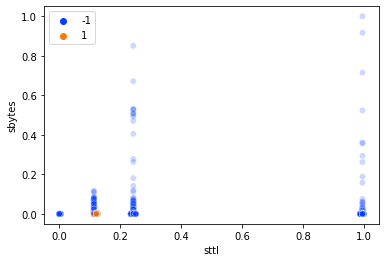

In [74]:
x1=df['sttl']
y1=df['sbytes']
sns.scatterplot(x= x1,y= y1, hue=anomaly_preds, palette='bright', alpha=0.2)
plt.show()

### Hyperparameter Tuning

In [ ]:
params = {'n_estimators': [100, 200, 300, 400],
         'max_samples': [100, 200, 300,400]}

score_table = pd.DataFrame(columns=['Number of Estimators', 'Max Sample Size',
                                    'Calinski Harabasz Score', 'Davies Bouldin Score'])


for num_est in params['n_estimators']:
    for maxsamp in params['max_samples']:
        iso_model = IsolationForest(random_state=0, n_estimators=num_est, max_samples=maxsamp).fit(df)
        anomaly_preds = iso_model.predict(df)
        calinski = calinski_harabasz_score(df, anomaly_preds)
        davies = davies_bouldin_score(df, anomaly_preds)
        score_table=score_table.append({'Number of Estimators':num_est, 
                                        'Max Sample Size':maxsamp,
                                        'Calinski Harabasz Score':calinski, 
                                        'Davies Bouldin Score':davies}, ignore_index=True)
        
display(score_table)

### Best Model

In [ ]:
iso_model_best = IsolationForest(random_state=0, n_estimators=100, max_samples=100).fit(df)

anomaly_preds_best = iso_model_best.predict(df)
pd.crosstab(anomaly_labels, anomaly_preds_best)

### Results with PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(df)

In [ ]:
sns.scatterplot(x= pca_components[:, 0], y= pca_components[:, 1], hue=anomaly_preds_best)